In [4]:
import pandas as pd
import numpy as np    
import statsmodels.api as sm
import datetime

from IPython.display import display, HTML, display_html
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [5]:
df=pd.read_csv('cleaned_data.csv')

In [6]:
df

,DATE,WTI
0,1986-01-03,25.78
1,1986-01-10,25.99
2,1986-01-17,24.57
3,1986-01-24,20.31
4,1986-01-31,19.69
...,...,...
1847,2021-05-28,66.40
1848,2021-06-04,68.74
1849,2021-06-11,70.11
1850,2021-06-18,71.55


In [7]:
df = df.rename(columns = {'DATE': 'ds', 'WTI': 'ts'})
df.set_index('ds', inplace=True)
df.sort_index(ascending=True, inplace=True)
df.index = pd.to_datetime(df.index)

In [8]:
df

,ts
ds,
1986-01-03,25.78
1986-01-10,25.99
1986-01-17,24.57
1986-01-24,20.31
1986-01-31,19.69
...,...
2021-05-28,66.40
2021-06-04,68.74
2021-06-11,70.11


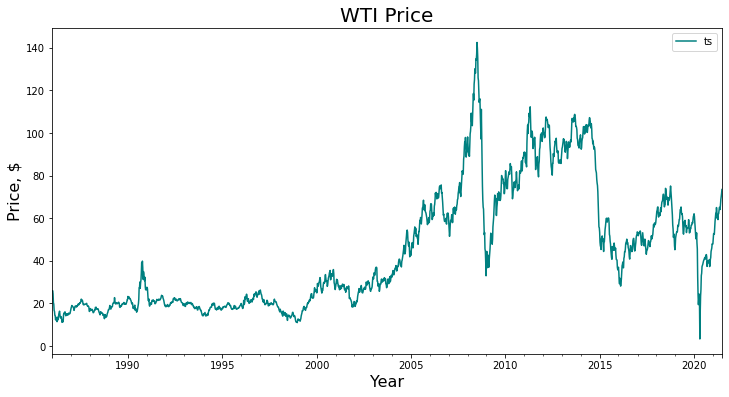

In [9]:
df.plot(figsize=(12,6), color='teal')
plt.title('WTI Price', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Price, $', fontsize=16)
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(df, ts):
  
    rolmean = df[ts].rolling(window = 12, center = False).mean()
    rolstd = df[ts].rolling(window = 12, center = False).std()
    
    orig = plt.plot(df[ts], 
                    color = 'blue', 
                    label = 'Original')
    mean = plt.plot(rolmean, 
                    color = 'red', 
                    label = 'Rolling Mean')
    std = plt.plot(rolstd, 
                   color = 'black', 
                   label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation for %s' %(ts))
    plt.xticks(rotation = 45)
    plt.show(block = False)
    plt.close()
    

    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(df[ts], 
                      autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index = ['Test Statistic',
                                  'p-value',
                                  '# Lags Used',
                                  'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

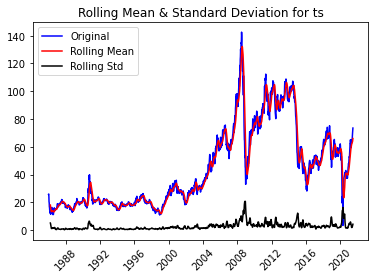

Results of Dickey-Fuller Test:
Test Statistic                   -2.521754
p-value                           0.110271
# Lags Used                       8.000000
Number of Observations Used    1843.000000
Critical Value (1%)              -3.433903
Critical Value (5%)              -2.863110
Critical Value (10%)             -2.567606
dtype: float64


In [11]:
test_stationarity(df = df, ts = 'ts')

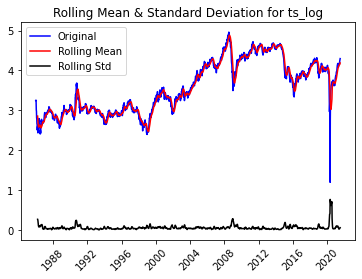

Results of Dickey-Fuller Test:
Test Statistic                   -2.108878
p-value                           0.240960
# Lags Used                       5.000000
Number of Observations Used    1846.000000
Critical Value (1%)              -3.433897
Critical Value (5%)              -2.863107
Critical Value (10%)             -2.567604
dtype: float64


In [12]:
df['ts_log']=df['ts'].apply(lambda x: np.log(x))
test_stationarity(df=df,ts='ts_log')

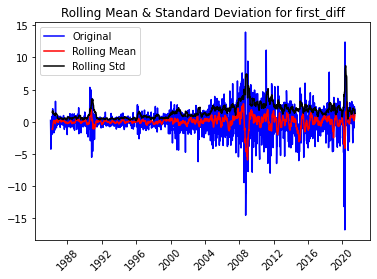

Results of Dickey-Fuller Test:
Test Statistic                -1.191255e+01
p-value                        5.255201e-22
# Lags Used                    7.000000e+00
Number of Observations Used    1.843000e+03
Critical Value (1%)           -3.433903e+00
Critical Value (5%)           -2.863110e+00
Critical Value (10%)          -2.567606e+00
dtype: float64


In [13]:
df['first_diff'] = df['ts'] - df['ts'].shift(1)
test_stationarity(df=df.dropna(inplace=False),ts='first_diff')

In [14]:
df['ts_log_ma']=df['ts_log'].rolling(window=7, center=False).mean()
df['ts_ma']=df['ts'].rolling(window=7, center=False).mean()

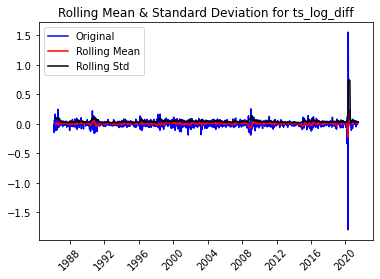

Results of Dickey-Fuller Test:
Test Statistic                -1.872369e+01
p-value                        2.032171e-30
# Lags Used                    4.000000e+00
Number of Observations Used    1.841000e+03
Critical Value (1%)           -3.433907e+00
Critical Value (5%)           -2.863111e+00
Critical Value (10%)          -2.567606e+00
dtype: float64


In [15]:
df['ts_log_diff']=df['ts_log'].diff()
test_stationarity(df=df.dropna(inplace=False),ts='ts_log_diff')

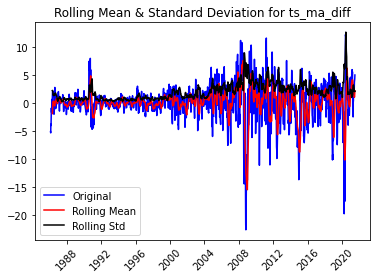

Results of Dickey-Fuller Test:
Test Statistic                -1.151152e+01
p-value                        4.248497e-21
# Lags Used                    8.000000e+00
Number of Observations Used    1.837000e+03
Critical Value (1%)           -3.433915e+00
Critical Value (5%)           -2.863115e+00
Critical Value (10%)          -2.567608e+00
dtype: float64


In [16]:
df['ts_ma_diff']=df['ts']-df['ts_ma']
test_stationarity(df=df.dropna(inplace=False),ts='ts_ma_diff')

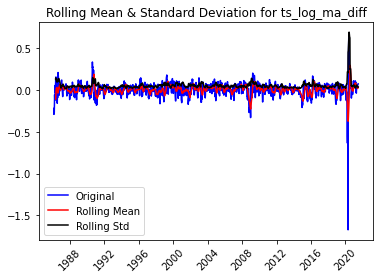

Results of Dickey-Fuller Test:
Test Statistic                -1.432960e+01
p-value                        1.105630e-26
# Lags Used                    6.000000e+00
Number of Observations Used    1.839000e+03
Critical Value (1%)           -3.433911e+00
Critical Value (5%)           -2.863113e+00
Critical Value (10%)          -2.567607e+00
dtype: float64


In [17]:
df['ts_log_ma_diff']=df['ts_log']-df['ts_log_ma']
test_stationarity(df=df.dropna(inplace=False),ts='ts_log_ma_diff')

In [18]:
df_new = df.dropna()
df

,ts,ts_log,first_diff,ts_log_ma,ts_ma,ts_log_diff,ts_ma_diff,ts_log_ma_diff
ds,,,,,,,,
1986-01-03,25.78,3.249599,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-10,25.99,3.257712,0.21,NaN,NaN,0.008113,NaN,NaN
1986-01-17,24.57,3.201526,-1.42,NaN,NaN,-0.056186,NaN,NaN
1986-01-24,20.31,3.011113,-4.26,NaN,NaN,-0.190413,NaN,NaN
1986-01-31,19.69,2.980111,-0.62,NaN,NaN,-0.031002,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-28,66.40,4.195697,2.29,4.159184,64.037143,0.035097,2.362857,0.036513
2021-06-04,68.74,4.230331,2.34,4.174088,65.010000,0.034634,3.730000,0.056243
2021-06-11,70.11,4.250065,1.37,4.191236,66.142857,0.019734,3.967143,0.058830


In [19]:
df_new.head(3)

,ts,ts_log,first_diff,ts_log_ma,ts_ma,ts_log_diff,ts_ma_diff,ts_log_ma_diff
ds,,,,,,,,
1986-02-14,16.25,2.788093,-0.47,3.043537,21.330000,-0.028513,-5.080000,-0.255444
1986-02-21,14.39,2.666534,-1.86,2.960242,19.702857,-0.121559,-5.312857,-0.293709
1986-02-28,14.25,2.656757,-0.14,2.874391,18.025714,-0.009777,-3.775714,-0.217634


In [20]:
df_new['ts_log_ewma']=df_new['ts_log'].ewm(halflife=7,ignore_na=False,min_periods=0,adjust=True).mean()

<ipython-input-20-1664ffb78dfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ts_log_ewma']=df_new['ts_log'].ewm(halflife=7,ignore_na=False,min_periods=0,adjust=True).mean()


<ipython-input-21-5655256c1117>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['ts_log_ewma_diff']=df_new['ts_log']-df_new['ts_log_ewma']


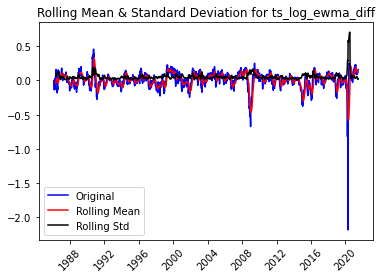

Results of Dickey-Fuller Test:
Test Statistic                -1.017553e+01
p-value                        6.908805e-18
# Lags Used                    6.000000e+00
Number of Observations Used    1.839000e+03
Critical Value (1%)           -3.433911e+00
Critical Value (5%)           -2.863113e+00
Critical Value (10%)          -2.567607e+00
dtype: float64


In [21]:
df_new['ts_log_ewma_diff']=df_new['ts_log']-df_new['ts_log_ewma']
test_stationarity(df=df_new.dropna(inplace=False),ts='ts_log_ewma_diff')

<ipython-input-22-89a17a43820c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['seasonal_first_diff'] = df_new.first_diff - df_new.first_diff.shift(12)


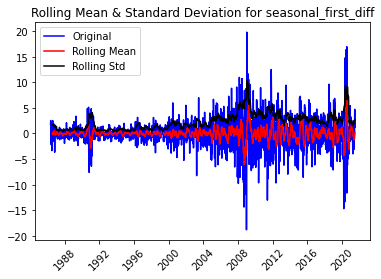

Results of Dickey-Fuller Test:
Test Statistic                -1.324043e+01
p-value                        9.194670e-25
# Lags Used                    2.400000e+01
Number of Observations Used    1.809000e+03
Critical Value (1%)           -3.433970e+00
Critical Value (5%)           -2.863139e+00
Critical Value (10%)          -2.567621e+00
dtype: float64


In [22]:
df_new['seasonal_first_diff'] = df_new.first_diff - df_new.first_diff.shift(12)  
test_stationarity(df=df_new.dropna(inplace=False), ts='seasonal_first_diff')

<ipython-input-23-17dcbb7d6594>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df_new['first_diff'], freq=52)
/Users/venkateshsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/venkateshsharma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[

<Figure size 432x288 with 0 Axes>

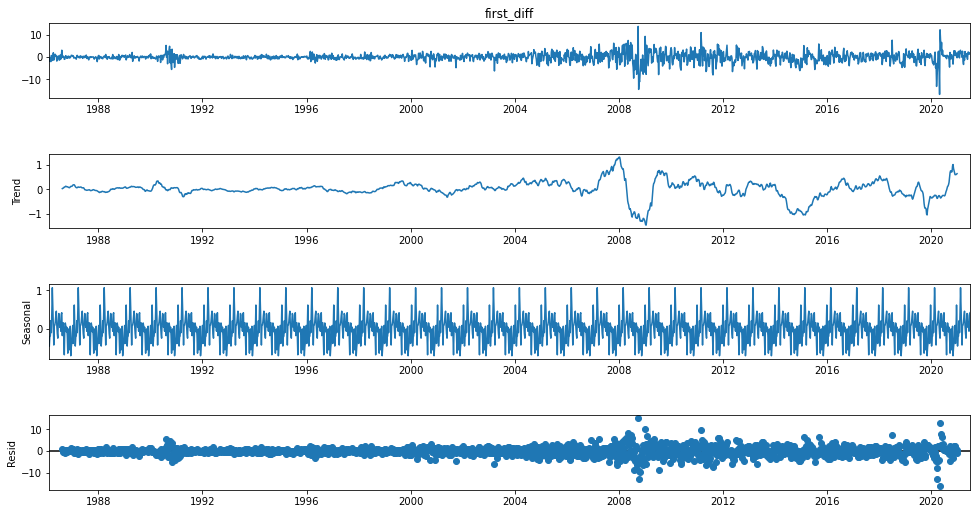

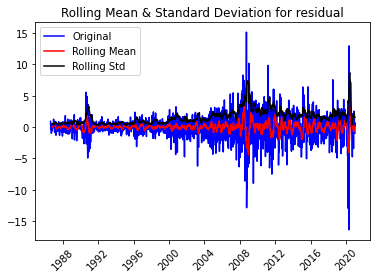

Results of Dickey-Fuller Test:
Test Statistic                -1.321814e+01
p-value                        1.014537e-24
# Lags Used                    2.400000e+01
Number of Observations Used    1.769000e+03
Critical Value (1%)           -3.434052e+00
Critical Value (5%)           -2.863175e+00
Critical Value (10%)          -2.567641e+00
dtype: float64


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_new['first_diff'], freq=52)

df_new.loc[:,'trend'] = decomposition.trend
df_new.loc[:,'seasonal'] = decomposition.seasonal
df_new.loc[:,'residual'] = decomposition.resid

fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

test_stationarity(df = df_new.dropna(), ts = 'residual')

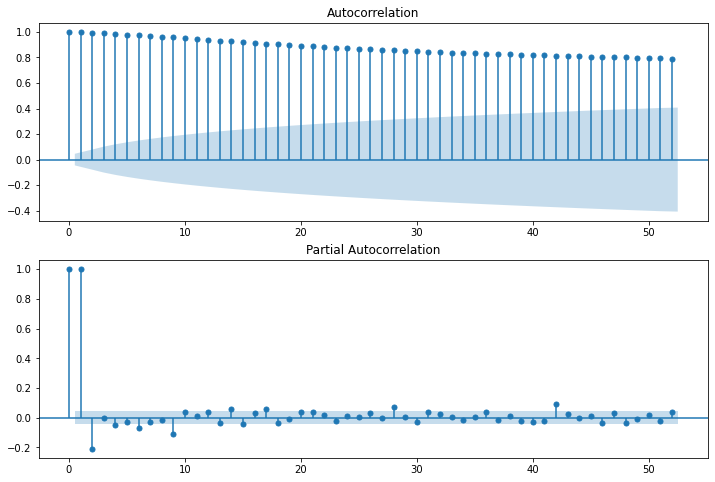

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df.ts.iloc[1:], lags=52,ax=ax1)
ax2 = fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df.ts.iloc[1:], lags=52,ax=ax2)

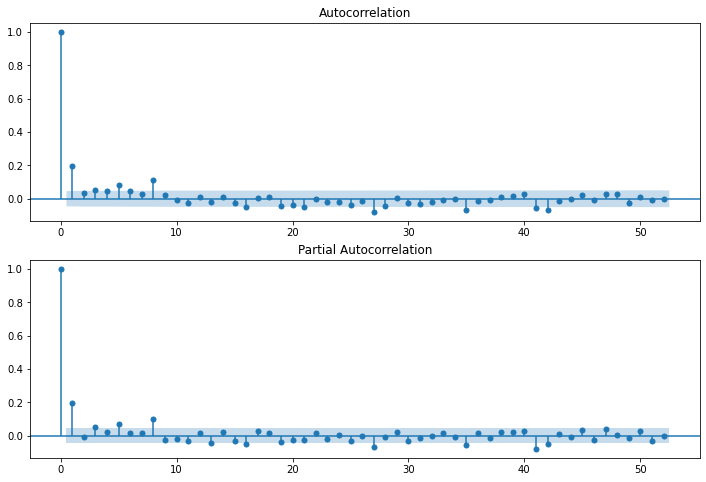

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_new.first_diff.iloc[1:], lags=52, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_new.first_diff.iloc[1:], lags=52, ax=ax2)

,ts,ts_log,first_diff,ts_log_ma,ts_ma,ts_log_diff,ts_ma_diff,ts_log_ma_diff
ds,,,,,,,,
1986-01-03,25.78,3.249599,NaN,NaN,NaN,NaN,NaN,NaN
1986-01-10,25.99,3.257712,0.21,NaN,NaN,0.008113,NaN,NaN
1986-01-17,24.57,3.201526,-1.42,NaN,NaN,-0.056186,NaN,NaN
1986-01-24,20.31,3.011113,-4.26,NaN,NaN,-0.190413,NaN,NaN
1986-01-31,19.69,2.980111,-0.62,NaN,NaN,-0.031002,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-05-28,66.40,4.195697,2.29,4.159184,64.037143,0.035097,2.362857,0.036513
2021-06-04,68.74,4.230331,2.34,4.174088,65.010000,0.034634,3.730000,0.056243
2021-06-11,70.11,4.250065,1.37,4.191236,66.142857,0.019734,3.967143,0.058830


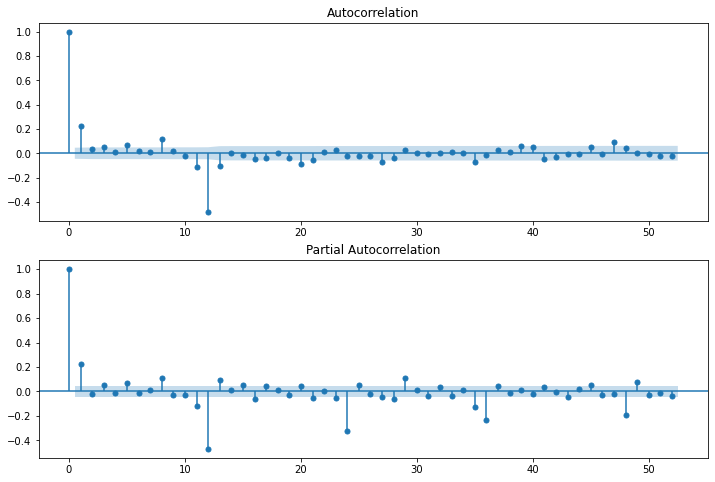

In [26]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_new.seasonal_first_diff.iloc[13:], lags=52, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_new.seasonal_first_diff.iloc[13:], lags=52, ax=ax2)
df

In [27]:
df_new['ts'][1839:]

ds
2021-05-14    65.07
2021-05-21    64.11
2021-05-28    66.40
2021-06-04    68.74
2021-06-11    70.11
2021-06-18    71.55
2021-06-25    73.48
Name: ts, dtype: float64

In [28]:
df_new.to_csv('modelling_data.csv')